In [219]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from fredapi import Fred
from matplotlib import pyplot as plt

# Step 3, 4

* *Identify, import, structure, and graph macroeconomic, microeconomic, and geopolitical variables that affect the price of oil globally.*

* *As a group, the team writes a dictionary of the data used and a table showing the data,
frequency, source, start date, end date, and other relevant fields.*

### Oil Prices

We are going to use the Crude Oil monthly futures data as our oil price proxy (yahoo finance ticker **"CL=F"**). This futures price data is extrapolated into the past such that we can use it as a historical proxy as well.

In [220]:
ticker_oil = "CL=F"
end_date = dt.date(2025, 9, 27)
start_date = dt.date(2001, 9, 1)
df_oil_price = yf.download(tickers=ticker_oil, start=start_date, end=end_date).droplevel(level=1, axis=1)
df_oil_price.loc[:, "Return"] = df_oil_price.loc[:, "Close"].pct_change()
df_oil_price = df_oil_price.loc[:, ["Close", "Return"]].dropna()
df_oil_price.columns.name = None
df_oil_price.columns = ["Price", "Return"]

print("-- Oil Prices Data Dictionary: --")
print("Frequency: Daily")
print("Source: Yahoo Finance")
print("Start Date:", start_date)
print("End Date:", end_date)
print("-"*40)
print(df_oil_price.info())
print("-"*40)
print(df_oil_price.describe())
df_oil_price

C:\Users\Atakan\AppData\Local\Temp\ipykernel_12188\1063459949.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_oil_price = yf.download(tickers=ticker_oil, start=start_date, end=end_date).droplevel(level=1, axis=1)
[*********************100%***********************]  1 of 1 completed

-- Oil Prices Data Dictionary: --
Frequency: Daily
Source: Yahoo Finance
Start Date: 2001-09-01
End Date: 2025-09-27
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6042 entries, 2001-09-05 to 2025-09-26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   6042 non-null   float64
 1   Return  6042 non-null   float64
dtypes: float64(2)
memory usage: 141.6 KB
None
----------------------------------------
             Price       Return
count  6042.000000  6042.000000
mean     66.231336    -0.000132
std      24.098848     0.049923
min     -37.630001    -3.059661
25%      48.417500    -0.012580
50%      65.814999     0.001043
75%      83.080002     0.013504
max     145.289993     0.376623


,Price,Return
Date,,
2001-09-05,26.950001,0.000743
2001-09-06,27.580000,0.023377
2001-09-07,28.030001,0.016316
2001-09-10,27.629999,-0.014270
2001-09-14,29.530001,0.068766
...,...,...
2025-09-22,62.639999,-0.000638
2025-09-23,63.410000,0.012292
2025-09-24,64.989998,0.024917


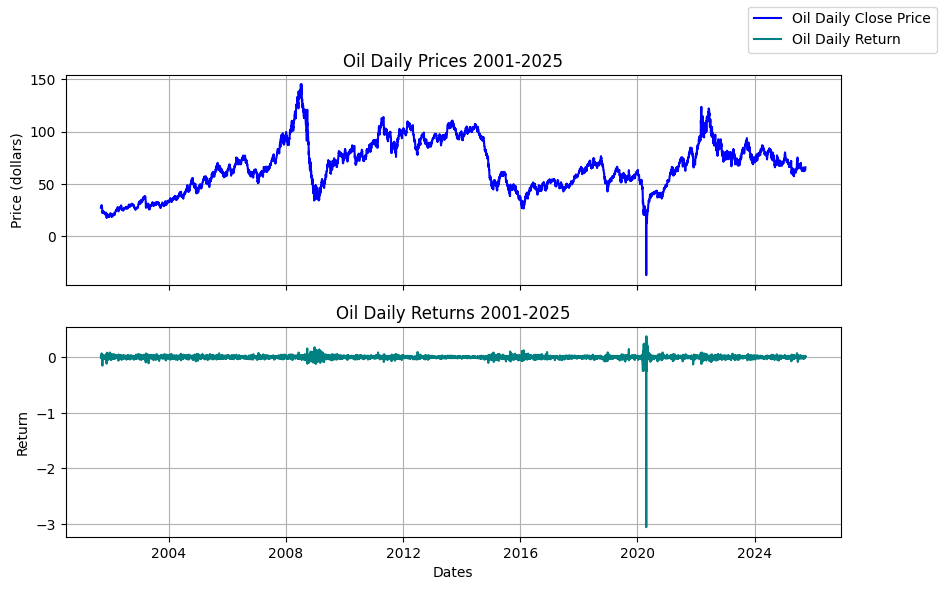

In [221]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
axs[0].plot(df_oil_price.loc[:, "Price"], label="Oil Daily Close Price", color="b")
axs[0].set_title("Oil Daily Prices 2001-2025")
axs[0].grid()
axs[0].set_ylabel("Price (dollars)")
axs[1].plot(df_oil_price.loc[:, "Return"], label="Oil Daily Return", color="teal")
axs[1].set_title("Oil Daily Returns 2001-2025")
axs[1].grid()
axs[1].set_ylabel("Return")
axs[1].set_xlabel("Dates")
fig.legend()

## Macroeconomic Data



### US Gross Domestic Product

We are going to use the US GDP for the macroeconomic dataset.

In [222]:
fred = Fred(api_key="0bebdda5c26c5b61d660182fe22a55c9")
df_gdp = fred.get_series("GDP").loc[start_date:end_date]
print("-- US GDP Data Dictionary: --")
print("Frequency: Quarterly")
print("Source: FRED")
print("Start Date:", start_date)
print("End Date:", end_date)
print("-"*40)
print(df_gdp.info())
print("-"*40)
print(df_gdp.describe())
df_gdp

-- US GDP Data Dictionary: --
Frequency: Quarterly
Source: FRED
Start Date: 2001-09-01
End Date: 2025-09-27
----------------------------------------
<class 'pandas.core.series.Series'>
DatetimeIndex: 95 entries, 2001-10-01 to 2025-04-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
95 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB
None
----------------------------------------
count       95.000000
mean     18170.183705
std       5336.430599
min      10660.465000
25%      14416.492000
50%      16953.838000
75%      21254.769000
max      30485.729000
dtype: float64


2001-10-01    10660.465
2002-01-01    10783.500
2002-04-01    10887.460
2002-07-01    10984.040
2002-10-01    11061.433
                ...    
2024-04-01    29147.044
2024-07-01    29511.664
2024-10-01    29825.182
2025-01-01    30042.113
2025-04-01    30485.729
Length: 95, dtype: float64

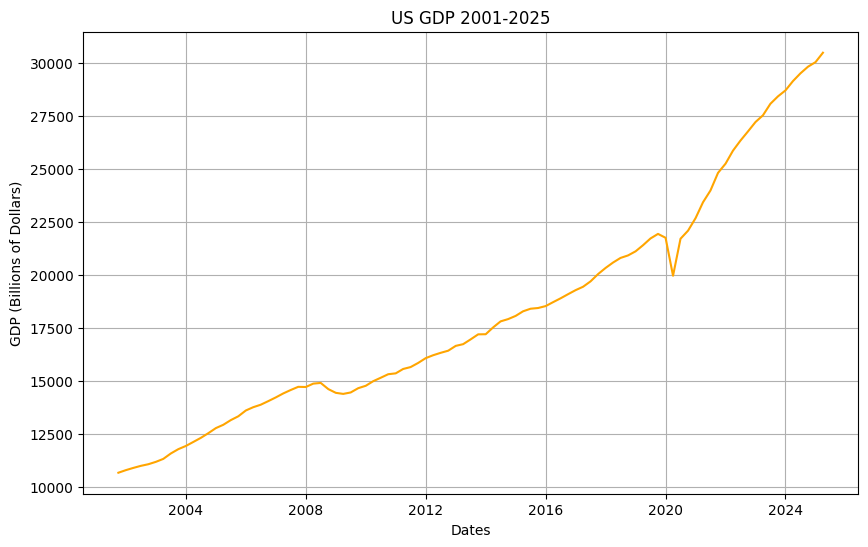

In [223]:
plt.figure(figsize=(10, 6))
plt.plot(df_gdp, label="US GDP", color="orange")
plt.ylabel("GDP (Billions of Dollars)")
plt.xlabel("Dates")
plt.title("US GDP 2001-2025")
plt.grid()

## Microeconomic Data

### US Producer Price Index by Industry: Total Manufacturing Industries

We are going to use the US Manufacturing PPI as our microeconomic proxy dataset, as its activities are highly relevant for the oil market.

In [224]:
df_ppi = fred.get_series("PCUOMFGOMFG").loc[start_date:end_date]
print("-- US Manufacturing PPI Data Dictionary: --")
print("Frequency: Monthly")
print("Source: FRED")
print("Start Date:", start_date)
print("End Date:", end_date)
print("-"*40)
print(df_ppi.info())
print("-"*40)
print(df_ppi.describe())
df_ppi

-- US Manufacturing PPI Data Dictionary: --
Frequency: Monthly
Source: FRED
Start Date: 2001-09-01
End Date: 2025-09-27
----------------------------------------
<class 'pandas.core.series.Series'>
DatetimeIndex: 288 entries, 2001-09-01 to 2025-08-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
288 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB
None
----------------------------------------
count    288.000000
mean     187.076451
std       33.809694
min      131.600000
25%      163.775000
50%      187.900000
75%      197.050000
max      262.418000
dtype: float64


2001-09-01    135.600
2001-10-01    133.700
2001-11-01    132.700
2001-12-01    131.600
2002-01-01    131.700
               ...   
2025-04-01    250.465
2025-05-01    251.339
2025-06-01    252.017
2025-07-01    253.663
2025-08-01    253.792
Length: 288, dtype: float64

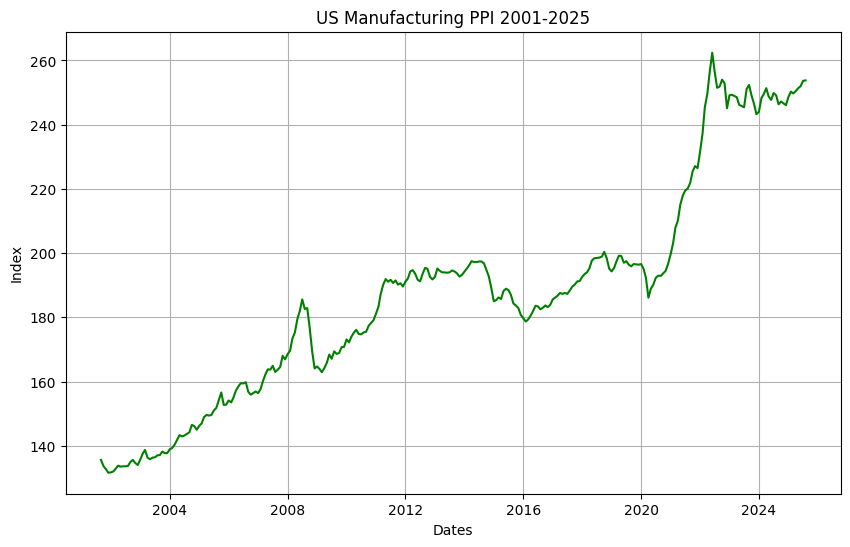

In [225]:
plt.figure(figsize=(10, 6))
plt.plot(df_ppi, color="green")
plt.ylabel("Index")
plt.xlabel("Dates")
plt.title("US Manufacturing PPI 2001-2025")
plt.grid()

______________________

# Step 5, 6

* *Clean the data.*
* As a group, all cleaning methods get combined to produce a “sterilized” version of the
data.

We first resample our datasets such that all datasets have the same timestamp indexes. Because our least frequent dataset is the US GDP dataset (quarterly), we are going to use these indexes to resample other datasets to quarterly time frequency.

Because the GDP announcements may happen on holidays, we first make the holidays roll forward to the next business day to avoid errors.

In [226]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

quarterly_indexes = df_gdp.index
cbd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
bd_quarterly_indexes = quarterly_indexes.map(cbd.rollforward)
print(bd_quarterly_indexes)

DatetimeIndex(['2001-10-01', '2002-01-02', '2002-04-01', '2002-07-01',
               '2002-10-01', '2003-01-02', '2003-04-01', '2003-07-01',
               '2003-10-01', '2004-01-02', '2004-04-01', '2004-07-01',
               '2004-10-01', '2005-01-03', '2005-04-01', '2005-07-01',
               '2005-10-03', '2006-01-03', '2006-04-03', '2006-07-03',
               '2006-10-02', '2007-01-02', '2007-04-02', '2007-07-02',
               '2007-10-01', '2008-01-02', '2008-04-01', '2008-07-01',
               '2008-10-01', '2009-01-02', '2009-04-01', '2009-07-01',
               '2009-10-01', '2010-01-04', '2010-04-01', '2010-07-01',
               '2010-10-01', '2011-01-03', '2011-04-01', '2011-07-01',
               '2011-10-03', '2012-01-03', '2012-04-02', '2012-07-02',
               '2012-10-01', '2013-01-02', '2013-04-01', '2013-07-01',
               '2013-10-01', '2014-01-02', '2014-04-01', '2014-07-01',
               '2014-10-01', '2015-01-02', '2015-04-01', '2015-07-01',
      

In [227]:
df_gdp_Q = df_gdp
df_gdp_Q.index = bd_quarterly_indexes

df_oil_price_Q = df_oil_price.reindex(df_oil_price.index.union(bd_quarterly_indexes))
df_oil_price_Q = df_oil_price_Q.ffill()
df_oil_price_Q = df_oil_price_Q.loc[bd_quarterly_indexes, :]

# Update returns to quarterly returns
df_oil_price_Q.loc[:, "Return"] = df_oil_price_Q.loc[:, "Price"].pct_change()
df_oil_price_Q

,Price,Return
2001-10-01,23.280001,NaN
2002-01-02,21.010000,-0.097509
2002-04-01,26.860001,0.278439
2002-07-01,26.809999,-0.001862
2002-10-01,30.830000,0.149944
...,...,...
2024-04-01,83.709999,0.189400
2024-07-01,83.379997,-0.003942
2024-10-01,69.830002,-0.162509
2025-01-02,73.129997,0.047258


In [228]:
df_ppi_Q = df_ppi.reindex(df_ppi.index.union(bd_quarterly_indexes))
df_ppi_Q = df_ppi_Q.ffill()
df_ppi_Q = df_ppi_Q.loc[bd_quarterly_indexes]
df_ppi_Q

2001-10-01    133.700
2002-01-02    131.700
2002-04-01    133.800
2002-07-01    133.600
2002-10-01    135.600
               ...   
2024-04-01    251.376
2024-07-01    249.847
2024-10-01    247.216
2025-01-02    248.662
2025-04-01    250.465
Length: 95, dtype: float64

In [229]:
# Merge all of them into a single dataframe
df_merged_Q = pd.DataFrame({"Oil Price":df_oil_price_Q.loc[:, "Price"].values,
                            "GDP":df_gdp_Q.values,
                            "PPI":df_ppi_Q.values}, index=df_gdp_Q.index)
df_merged_Q

,Oil Price,GDP,PPI
2001-10-01,23.280001,10660.465,133.700
2002-01-02,21.010000,10783.500,131.700
2002-04-01,26.860001,10887.460,133.800
2002-07-01,26.809999,10984.040,133.600
2002-10-01,30.830000,11061.433,135.600
...,...,...,...
2024-04-01,83.709999,29147.044,251.376
2024-07-01,83.379997,29511.664,249.847
2024-10-01,69.830002,29825.182,247.216
2025-01-02,73.129997,30042.113,248.662


In [230]:
df_returns_Q = df_merged_Q.pct_change(axis=0)
df_returns_Q

,Oil Price,GDP,PPI
2001-10-01,NaN,NaN,NaN
2002-01-02,-0.097509,0.011541,-0.014959
2002-04-01,0.278439,0.009641,0.015945
2002-07-01,-0.001862,0.008871,-0.001495
2002-10-01,0.149944,0.007046,0.014970
...,...,...,...
2024-04-01,0.189400,0.015288,0.029993
2024-07-01,-0.003942,0.012510,-0.006083
2024-10-01,-0.162509,0.010624,-0.010530
2025-01-02,0.047258,0.007273,0.005849


Fixing missing values by backward fill:

In [231]:
df_returns_Q = df_returns_Q.bfill()
df_returns_Q

,Oil Price,GDP,PPI
2001-10-01,-0.097509,0.011541,-0.014959
2002-01-02,-0.097509,0.011541,-0.014959
2002-04-01,0.278439,0.009641,0.015945
2002-07-01,-0.001862,0.008871,-0.001495
2002-10-01,0.149944,0.007046,0.014970
...,...,...,...
2024-04-01,0.189400,0.015288,0.029993
2024-07-01,-0.003942,0.012510,-0.006083
2024-10-01,-0.162509,0.010624,-0.010530
2025-01-02,0.047258,0.007273,0.005849


<Axes: title={'center': 'Quarterly Value Changes'}>

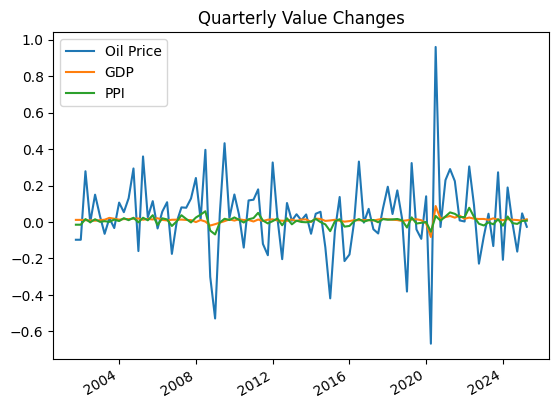

In [232]:
df_returns_Q.plot(title="Quarterly Value Changes")

Removing extreme outliers:

<Axes: title={'center': 'Z-scores of Quarterly Value Changes'}>

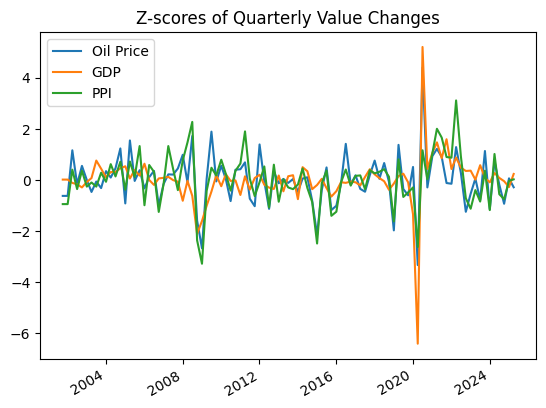

In [233]:
df_z_scores = (df_returns_Q - df_returns_Q.mean(axis=0)) / df_returns_Q.std(axis=0, ddof=1)
df_z_scores.plot(title="Z-scores of Quarterly Value Changes")

<Axes: title={'center': 'Outliers Removed'}>

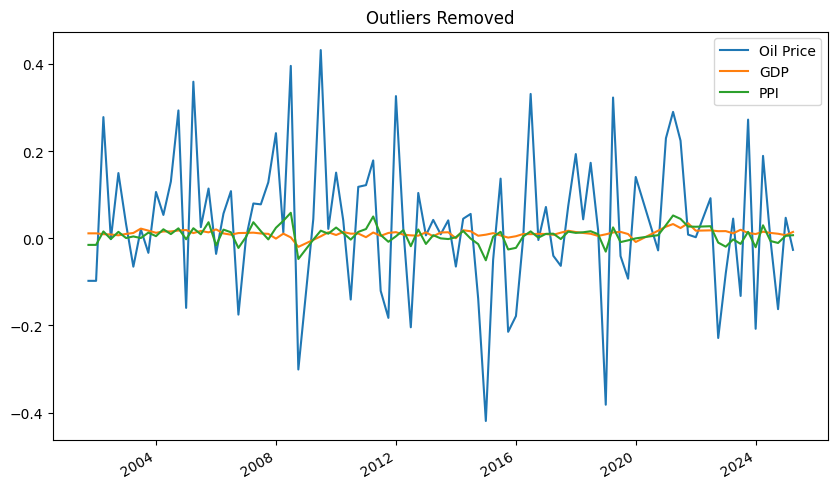

In [234]:
z_scores_mask = (df_z_scores.abs() <= 3).all(axis=1)
df_removed_outliers = df_returns_Q.loc[z_scores_mask, :]
df_removed_outliers
df_removed_outliers.plot(title="Outliers Removed", figsize=(10, 6))

<Axes: title={'center': 'z-scores after outliers removed'}>

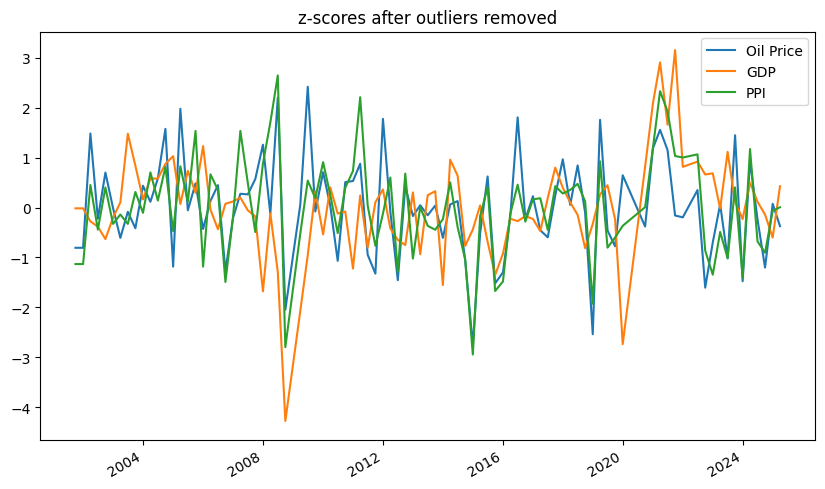

In [235]:
((df_removed_outliers - df_removed_outliers.mean(axis=0)) / df_removed_outliers.std(axis=0, ddof=1)).plot(title="z-scores after outliers removed", figsize=(10, 6))

____________

# Step 7

## Distributional Plots

Text(0.5, 1.0, 'Oil Price Returns')

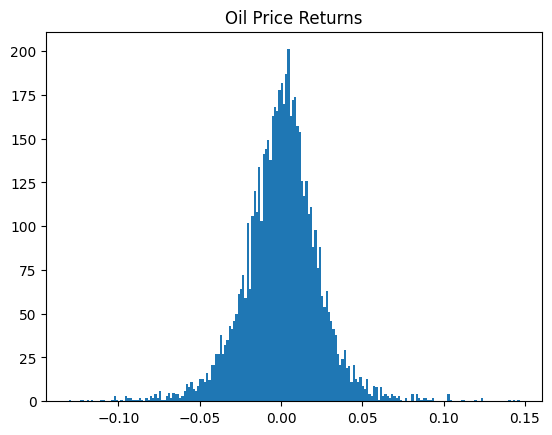

In [236]:
# Oil prices
df_oil_price_returns = df_oil_price.loc[:, "Return"]
df_oil_price_returns_z = (df_oil_price_returns - df_oil_price_returns.mean()) / df_oil_price_returns.std(ddof=1)
z_mask = (df_oil_price_returns_z.abs() <= 3)
df_oil_price_returns_clean = df_oil_price_returns[z_mask]

plt.hist(df_oil_price_returns_clean, bins=200)
plt.title("Oil Price Returns")

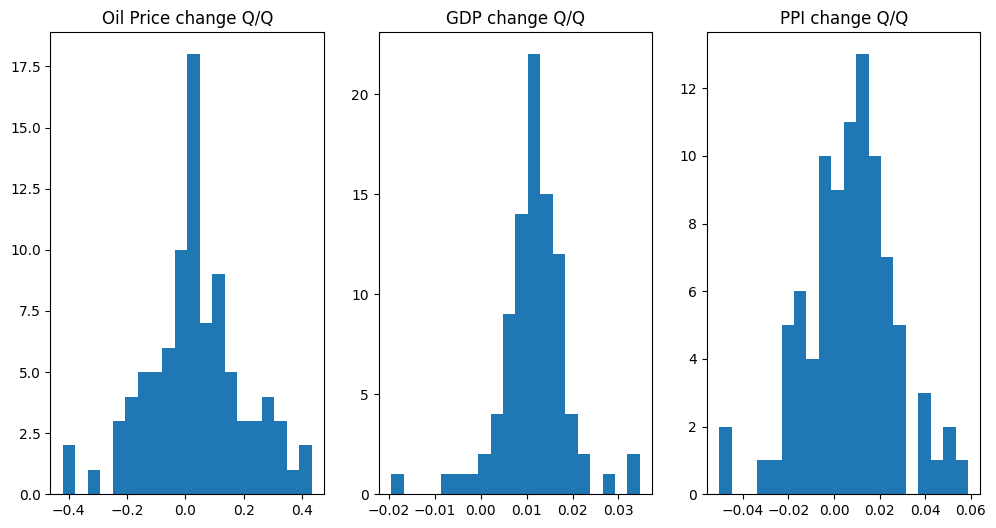

In [237]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
for i, col in enumerate(df_removed_outliers.columns):
    axs[i].hist(df_removed_outliers.loc[:, col], bins=20)
    axs[i].set_title(col + " change Q/Q")

## Time series plots